In [1]:
print("""
@Description: Reading, Visualizing, and Saving Data in Python
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-08-13 22:44:14
""")


@Description: Reading, Visualizing, and Saving Data in Python
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-08-13 22:44:14



In [2]:
from sqlalchemy import create_engine
import pandas as pd

In [3]:
%matplotlib inline

In [7]:
cnxn_string = (
    'postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}'
)
engine = create_engine(cnxn_string.format(username='postgres',
                                          pswd='abc123',
                                          host='localhost',
                                          port=5432,
                                          database='sql4da'))

In [15]:
query = """
select city, count(*) as number_of_customers, count(nullif(gender, 'M')) as female, count(nullif(gender, 'F')) as male
from customers
where city is not null
group by 1
order by 2 desc
limit 10
"""

In [16]:
top_cities_data = pd.read_sql_query(query, engine)

The pandas read_sql_query method will run a SQL query against the database server that the engine points to and return the result in a pandas DataFrame. 

In [17]:
top_cities_data

,city,number_of_customers,female,male
0,Washington,1447,734,713
1,Houston,904,446,458
2,New York City,731,369,362
3,El Paso,713,369,344
4,Dallas,607,309,298
5,Atlanta,571,292,279
6,Sacramento,506,244,262
7,Los Angeles,466,241,225
8,San Antonio,426,207,219
9,Miami,426,195,231


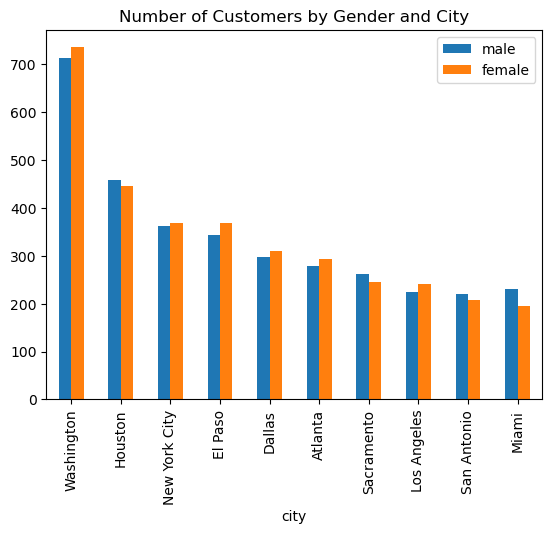

In [18]:
ax = top_cities_data.plot.bar(
    x='city',
    y=['male', 'female'],
    title='Number of Customers by Gender and City',
)

In [20]:
top_cities_data.to_sql(
    'top_cities_data',
    engine,
    index=False,
    if_exists='replace',
)

10

In addition to the two required parameters, you added two optional parameters to this function. The index parameter specifies whether you want the index to be a column in your database table as well (a value of False means that you will not include it), and the if_exists parameter allows you to specify how to handle a scenario in which there is already a table with the same name in the database. In this case, you want to drop that table and replace it with the new data, so you use the 'replace' option. In general, you should exercise caution when using the 'replace' option as you can inadvertently lose your existing data.